In [79]:
import requests as req
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
appkey = "bgy96hxcecgj62e84apgdejn"
brkcik = "0001067983"

In [4]:
query_url = "http://edgaronline.api.mashery.com/v2/ownerships/currentownerholdings?ciks=%s&appkey=%s" % (brkcik, appkey)
print(query_url)

http://edgaronline.api.mashery.com/v2/ownerships/currentownerholdings?ciks=0001067983&appkey=bgy96hxcecgj62e84apgdejn


In [5]:
sec_data = req.get(query_url).json()
print(json.dumps(sec_data, indent=4, sort_keys=True))

{
    "result": {
        "rows": [
            {
                "rownum": 1,
                "values": [
                    {
                        "field": "querydate",
                        "value": "8/21/2017 2:13 PM"
                    },
                    {
                        "field": "filerid",
                        "value": 54239
                    },
                    {
                        "field": "cik",
                        "value": "0001067983"
                    },
                    {
                        "field": "currentreportdate",
                        "value": "6/30/2017 12:00 AM"
                    },
                    {
                        "field": "priorreportdate",
                        "value": "3/31/2017 12:00 AM"
                    },
                    {
                        "field": "ownername",
                        "value": "BERKSHIRE HATHAWAY INC"
                    },
                    {
               

In [41]:
currentreportdate = None
sec_json = []
for row in sec_data["result"]["rows"]:
    ticker = None
    company = None
    shares = None
    marketvalue = None
    for value in row["values"]:
        if not(currentreportdate) and value["field"] == "currentreportdate":
            currentreportdate = value["value"]
        if value["field"] == "ticker":
            ticker = value["value"]
        if value["field"] == "companyname":
            company = value["value"]
        if value["field"] == "sharesheld":
            shares = value["value"]
        if value["field"] == "marketvalue":
            marketvalue = value["value"]
    if ticker and company and shares and marketvalue:
        #print({'ticker': ticker, 'company': company, 'shares': float(shares), 'marketvalue': float(marketvalue)})
        sec_json.append({'ticker': ticker, 'company': company, 'shares': float(shares), 'marketvalue': float(marketvalue)})
   
#print(sec_json)
sec_df = pd.DataFrame(sec_json)
print(currentreportdate)
sec_df.head()

6/30/2017 12:00 AM


,company,marketvalue,shares,ticker
0,RESTAURANT BRANDS INTL INC,511103288.0,8438225.0,QSR
1,AXALTA COATING SYS LTD,681060800.0,23324000.0,AXTA
2,GRAHAM HLDGS CO,61823353.0,107575.0,GHC
3,SIRIUS XM HLDGS INC,757157352.0,137915729.0,SIRI
4,LIBERTY GLOBAL PLC,237968294.0,7346968.0,LBTYK


In [42]:
secsum_df = sec_df.groupby(['ticker','company'], as_index=False).sum()
secsum_df.head()

,ticker,company,marketvalue,shares
0,AAPL,APPLE INC,2.050523e+10,130191960.0
1,AXTA,AXALTA COATING SYS LTD,6.810608e+08,23324000.0
2,BK,BANK NEW YORK MELLON CORP,2.616962e+09,50229588.0
3,CHTR,CHARTER COMMUNICATIONS INC NEW,3.711009e+09,9443491.0
4,COST,COSTCO WHSL CORP NEW,6.806847e+08,4333363.0


In [43]:

for idx, row in secsum_df.iterrows():
    time.sleep(5)
    ticker_url = 'http://edgaronline.api.mashery.com/v2/ownerships/issues?filter=ticker eq "%s"&appkey=%s' % (row["ticker"], appkey)
    print(ticker_url)
    ticker_data = req.get(ticker_url).json()
    try:
        for row in ticker_data["result"]["rows"]:
            sector = None
            sectorid = None
            industry = None
            industryid = None
            for value in row["values"]:
                if value["field"] == "sector":
                    sector = value["value"]
                if value["field"] == "sectorid":
                    sectorid = value["value"]
                if value["field"] == "industry":
                    industry = value["value"]
                if value["field"] == "industryid":
                    industryid = value["value"]
            if sector and sectorid and industry and industryid:
                secsum_df.set_value(idx,"sector", sector)
                secsum_df.set_value(idx,"sectorID", int(sectorid))
                secsum_df.set_value(idx,"industry", industry)
                secsum_df.set_value(idx,"industryID", int(industryid))
    except:
        print("error grabbing data for %s" % (row["ticker"]))


http://edgaronline.api.mashery.com/v2/ownerships/issues?filter=ticker eq "AAPL"&appkey=bgy96hxcecgj62e84apgdejn
http://edgaronline.api.mashery.com/v2/ownerships/issues?filter=ticker eq "AXTA"&appkey=bgy96hxcecgj62e84apgdejn
http://edgaronline.api.mashery.com/v2/ownerships/issues?filter=ticker eq "BK"&appkey=bgy96hxcecgj62e84apgdejn
http://edgaronline.api.mashery.com/v2/ownerships/issues?filter=ticker eq "CHTR"&appkey=bgy96hxcecgj62e84apgdejn
http://edgaronline.api.mashery.com/v2/ownerships/issues?filter=ticker eq "COST"&appkey=bgy96hxcecgj62e84apgdejn
http://edgaronline.api.mashery.com/v2/ownerships/issues?filter=ticker eq "GHC"&appkey=bgy96hxcecgj62e84apgdejn
http://edgaronline.api.mashery.com/v2/ownerships/issues?filter=ticker eq "GS"&appkey=bgy96hxcecgj62e84apgdejn
http://edgaronline.api.mashery.com/v2/ownerships/issues?filter=ticker eq "IBM"&appkey=bgy96hxcecgj62e84apgdejn
http://edgaronline.api.mashery.com/v2/ownerships/issues?filter=ticker eq "KHC"&appkey=bgy96hxcecgj62e84apgdejn

In [44]:
secsum_df.head()

,ticker,company,marketvalue,shares,sector,sectorID,industry,industryID
0,AAPL,APPLE INC,2.050523e+10,130191960.0,Technology,27.0,Computer Hardware,169.0
1,AXTA,AXALTA COATING SYS LTD,6.810608e+08,23324000.0,Basic Materials,21.0,Commodity Chemicals,15.0
2,BK,BANK NEW YORK MELLON CORP,2.616962e+09,50229588.0,Financials,25.0,Investment Management & Fund Operators,208.0
3,CHTR,CHARTER COMMUNICATIONS INC NEW,3.711009e+09,9443491.0,Consumer Cyclicals,23.0,Broadcasting,94.0
4,COST,COSTCO WHSL CORP NEW,6.806847e+08,4333363.0,Consumer Cyclicals,23.0,Discount Stores,101.0


In [107]:
file_date = currentreportdate.split(" ")[0]
file_prefix = file_date.replace("/","_") 
output_file = file_prefix + "_brk.csv"
chart_output_fig = file_prefix + "_chart_brk.png"

#print(output_file)
secsum_df.to_csv(output_file,index=False)

In [108]:
shr_yaxis = secsum_df.groupby(["industry"])["shares"].sum()
mval_yaxis = secsum_df.groupby(["industry"])["marketvalue"].sum()
xaxis = secsum_df["industry"].unique()

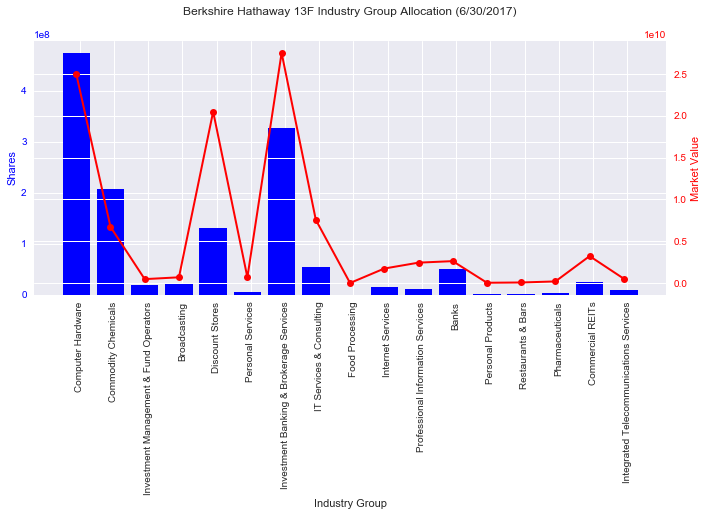

In [110]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7.5)
ax1.bar(range(len(xaxis)), shr_yaxis, color="blue", label="Shares")
tick_locations = [value + 0.1 for value in range(len(xaxis))]
ax1.set_xticks(tick_locations)
ax1.set_xticklabels(xaxis, rotation=90)

ax1.set_title("Berkshire Hathaway 13F Industry Group Allocation (%s)" % file_date, y = 1.08)
ax1.set_xlabel("Industry Group")

ax1.set_ylabel("Shares", color="blue")
ax1.tick_params('y', colors="blue")

ax1b = ax1.twinx()
ax1b.plot(range(len(xaxis)), mval_yaxis, "o-", lw=2, color="red", label = 'Market Value')
ax1b.set_ylabel("Market Value", color="red")
ax1b.tick_params('y', colors="red")

sns.set()
plt.tight_layout()
plt.savefig(chart_output_fig)
plt.show()